# Applied Data Science Capstone - Fifth Week Exercise <a class="anchor" id="TOP"></a>
## Table of Contents

<ul>
    <li><a href="#ITBP">1. Introduction to Business Problem</a></li>
    <ul>
        <li><a href="#BCD">1.1 Brief Description of Colombia</a></li>
        <li><a href="#DS">1.2 Data Sources</a></li>
    </ul>
    <li><a href="#methodology">2. Methodology</li>
    <li><a href="#DP">3. Data Preparation and Analysis</a></li>
    <ul>
        <li><a href="#PC">3.1 Population per Community ("<i>Comuna</i>")</a></li>
        <li><a href="#polygons">3.2 Communities Polygons</a></li>
        <li><a href="#pop_density">3.3 Population Density</a></li>
        <li><a href="#HCR">3.4 Historical Criminal Records</a></li>
        <li><a href="#PRA1">3.5 Partial Results</a></li>
    </ul>
    <li><a href="#profiling">4. Medellín Commercial Profiling</a></li>
    <ul>
        <li><a href="#LCL">4.1 Sampling Large Cities</a></li>
        <ul>
            <li><a href="#EUC">4.1.1 European Large Cities</a></li>
            <li><a href="#USAC">4.1.2 United States Cities</a></li>
            <li><a href="#med2df">4.1.3 Adding Medellín to Cities Dataset</a></li>
        </ul>
        <li><a href="#JDT2">4.2 Joinning Data Sets Together</a></li>
        <li><a href="#enrich">4.3 Enrich with Venues</a></li>
        <li><a href="#train">4.4 Trainning and Testing City Classifier</a></li>
        <li><a href="#classify">4.5 Classifying Medellín</a></li>
    </ul>
    <li><a href="#conclusion">5. Conclusion</a></li>
</ul>


<style>
#ColMap  {
 float: right;    
 margin: 0 0 0 15px;
}
</style>
## 1. Introduction to Business Problem <a class="anchor" id="ITBP"></a>
<img src="resources/World-Data-Locator-Map-Colombia.jpg" alt="Drawing" style="width: 300px; float: right; margin: 25px 0 0 15px;" align="left" />
<!--
https://es.wikipedia.org/wiki/Colombia#/media/Archivo:COL_orthographic_(San_Andr%C3%A9s_and_Providencia_special).svg
-->
Let's suppose I work for a retail company trying to position a new store format of small convenience stores.  
In the first part of this exercise, it is required to compare large cities in Colombia  - South America with cities with similar population in Europe and North America trying to establish if they are more like americans or europeans.  It may help this hypothetical retail convenience store chain to determine if their stores format should follow European or American model.  
In the second part of the study I will try to test a procedure to select places to open new stores, and determine criteria that consider low coverage, low crime rate, and large population.  
A priory, the stewardship committee think that good location for new stores are those places with lack of coverage (small number of other convenience stores), high population, and low crime rate.  
My (hypothetical) sponsor is also interested in clustering neighbourhoods based on the recent census information to see if they can identify neighbourhood particularities that can be considered to personalize store formats.  
For this study, I will limit my effort to Medellín, but the objective is establish a repeatable procedure that can be then used to analyze other cities such as Bogotá, Cali, Barranquilla.  
<br><a href="#TOP">Return to Top</a>

### 1.1 Brief Description of Colombia <a class="anchor" id="BDC"></a>
Colombia is a country located north of South America, with an estimated population of 48 million people, and a GDP of US<span>&#36;</span>  744,696 or US<span>&#36;</span>  14,943 per capita, on a territory of 1,140,000 km², the area of Portugal, Spain, and France together.  The main cities are Bogotá, the country's captial with a population of 7.1 million people, followed by Medellín with a metropolian area of 3.7 million people, Cali (2.4 million people), and Barranquilla (1.2 million people).
<br><a href="#TOP">Return to Top</a>

## 1.2 Data Sources <a class="anchor" id="DS"></a>
<ul>
<li>Historical Criminal Records: "Ministerio de Defensa Nacional - Policía Nacional". This information is publicly available at https://www.policia.gov.co/grupo-informaci%C3%B3n-criminalidad/estadistica-delictiva</li>
<li>National Census Information: "Censo Nacional de Población y Vivienda". This information is publicly available at https://www.dane.gov.co/index.php/estadisticas-por-tema/demografia-y-poblacion/censo-nacional-de-poblacion-y-vivenda-2018</li>
<li>Borders of neighbourhoods, Medellín city: https://geomedellin-m-medellin.opendata.arcgis.com/datasets/limite-barrio-vereda-catastral/geoservice</li>
<li>FourSquare: information available through Foursquare API</li>
</ul>
<br><a href="#TOP">Return to Top</a>

## 2. Methodology <a class="anchor" id="methodology"></a>
<p>To conduct the present study, I will execute three tasks:
    <ul>
    <li>Understand different zones or communities population density: I will take population information and geographical information to determine the population density, understood as the number of inhabitants per square kilometer and map these data to present in graphical understandable way.</li>
    <li>analyze the criminal profile of different zones or communities on Medellín city: I will compile and cleanse crime records, group them by community and divide them by population for having the number of incidents per 100.000 inhabitants.  These information will be presented graphically in maps for easy understanding</li>
    <li>determine if Medellin commercial profile is more like european cities or United State of America cities: I will take a sample of large cities in Europe and United States of America, prepare the data, and train a classifier.  For city classification, knn classifier will be used and the sampĺe will be splitted in training and testing sets.  If the classification accuracy is good enough, it will be used to classify Medellín</li>
    </ul>
</p>
<p>The recommendation on which store format to use will depend on the commercial profile of the city while the decision on the place to invest will be determined by Decisions will be driven by the population density and the criminal profile of the site, in favor of places with high population but low criminal activity</p>
<br><a href="#TOP">Return to Top</a>

## 3. Data Preparation <a class="anchor" id="DP"></a> 
<p>There are several challenges in preparing the information. One of the issues to resolve is that there isn't a consistent Postal Zone classification as in other countries.  Neighbourhood definition may not be consistent across different information sources and neighbourhood names are also inconsistent among sources.  At this time, I am not sure that combining this information can be done at a reasonable effort for this exercise.  
For this study I may face some data limitations as not having enough discrimination on criminal statistics by neighbourhood and/or postal zone in colombian cities and not having information on profitability of existing convenience stores.  So, the first effort will be to search for information sources and try to combine them in a way that allows me to enrich information available in Foursquare.</p>
<p>The following paragraph will briefly describe the actions required to prepare the data to be used.  For a complete revision of data preparation, see <i>Medellin Crime Profiling</i> and <i>City Classifier</i> notebooks.</p>
<a href="#TOP">Return to Top</a>

In [22]:
# import required packages to explore data
import pandas as pd
import geopandas as gpd
import wget
import matplotlib.pyplot as plt
import os
import numpy as np

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as ttsplit
from sklearn import metrics

%matplotlib inline

### 3.1 Population per Communities (locally known as "<i>Comunas</i>") <a name='PC'></a>
<p>Public available Colombian Census of 2018 showed useless given that does not have georreferencing information for granting privacy.</p>
<p>There is another public source of information for population at https://www.medellin.gov.co/irj/portal/medellin?NavigationTarget=navurl://06bdb4d911e35cb9d3de717115deedc3, having population per *comuna*.  A *comuna* is a set of neighbourhoods, so I will scale the study to comunas level.</p>
<p>The following lines shows the layout of the available file and the steps to extract the required information from them.</p>
<a href="#TOP">Return to Top</a

Data is provided at Comuna/Corregimiento level, in age buckets, as well as consolidated. as shown in the following table (if you are re executing this notebook, jump to <a href="reloadCommPpl">reloading community population</a> to save time): 

In [8]:
url="https://www.medellin.gov.co/irj/go/km/docs/pccdesign/SubportaldelCiudadano_2/PlandeDesarrollo_0_17/IndicadoresyEstadsticas/Shared%20Content/Documentos/ProyeccionPoblacion2016-2020/2016-06-10%20Proyecciones%20de%20Poblacion%20Medellin%202016_2020%20en%20xlsx.xlsx"
df = pd.read_excel(url, sheet_name=1)

# For our study, I will take only total projected population for 2018, for comunas and corregimientos, excluding age buckets.

df = df[(df['grupo_edad']=='Total') & (~df['codigo'].isin(['Total Medellín', 'Suma Comunas', 'Suma Corregimientos']))]
commPpl = df[['codigo', 'total_2018']]
commPpl.head()

# save this partial result.
commPpl.to_csv("resources/commPpl.csv")

# In case you are re-running this notebook, the following line reloads the communities population dataframe
# commPpl = pd.read_csv("resources/commPpl.csv")
commPpl.head()

,codigo,total_2018
0,Popular,131968
18,Santa Cruz,113024
36,Manrique,161735
54,Aranjuez,163213
72,Castilla,151361


<br><a href="#TOP">Return to Top</a>
### 3.2 Communities Polygons <a name='poligons'></a>
Medellín major office provides geo-reference data for neighbourhood and communities. To obtain the polygons for Medellín communities, we can use their a provided resource at:
https://www.medellin.gov.co/mapas/rest/services/ServiciosCatastro/OPENDATA_Catastro/MapServer/7/query?where=1%3D1&outFields=*&outSR=4326&f=json. To obtain polygons for communities we can obtain them at https://opendata.arcgis.com/datasets/7a8ad9f85799453e9dab4dc0c8c80bb3_3.geojson
<p>The following lines shows a Medellín map with their neighbourhoods.

In [11]:
neighbourhoods = gpd.read_file('https://www.medellin.gov.co/mapas/rest/services/ServiciosCatastro/OPENDATA_Catastro/MapServer/7/query?where=1%3D1&outFields=*&outSR=4326&f=json')
neighbourhoods.to_csv("resources/Communities.csv")
neighbourhoods.head()

,OBJECTID,SHAPE.AREA,SHAPE.LEN,COMUNA,BARRIO,CODIGO,NOMBRE_BARRIO,NOMBRE_COMUNA,geometry
0,1,204882.645781,3546.189505,02,02,0202,Playón de Los Comuneros,SANTA CRUZ,"POLYGON ((-75.54570 6.30533, -75.54570 6.30533..."
1,2,365914.672294,2977.786878,11,12,1112,El Velódromo,LAURELES,"POLYGON ((-75.59581 6.25820, -75.59581 6.25819..."
2,3,162805.286456,1874.051286,16,19,1619,Miravalle,BELEN,"POLYGON ((-75.59860 6.23613, -75.59834 6.23609..."
3,4,389352.847996,3111.744441,03,03,0303,Campo Valdés No. 2,MANRIQUE,"POLYGON ((-75.55166 6.27677, -75.55156 6.27674..."
4,5,282865.963603,2652.666236,05,12,0512,Oleoducto,CASTILLA,"POLYGON ((-75.56847 6.28796, -75.56846 6.28796..."


<p>Sadly, we don't have population information with such a level of detail, so we have to work at community level</p>

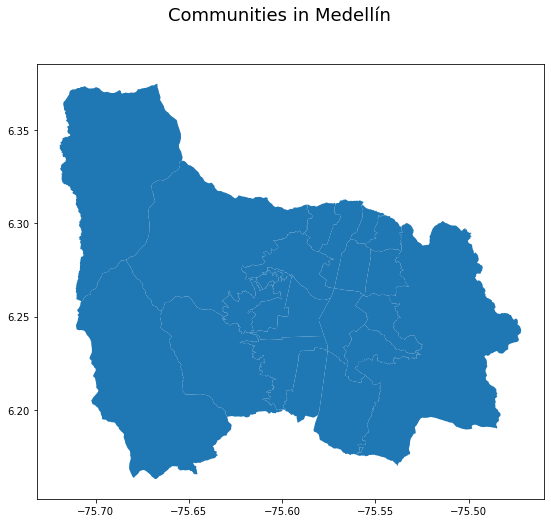

In [9]:
url="https://opendata.arcgis.com/datasets/7a8ad9f85799453e9dab4dc0c8c80bb3_3.geojson"

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Communities in Medellín', fontsize=18)
comunas=gpd.read_file(url)
comunas.plot(ax=ax)

<br><a href="#TOP">Return to Top</a>
### 3.3 Population Density <a name='pop_density'></a>
<p>Let's now combine communities map with their population, where color intensity represents their population</p>
In spite of maps and population information comes from the same public bureau, the names of communities is not always consistent in a non-systematic way. It cannot be fixed by a simple programatic rule but by human intervention.  So, lets read fixed population data from a file I prepared in Excel.</p>

In [10]:
commPpl_edited = pd.read_csv("resources/commPpl_edited.csv")
commPpl_edited.head()

,Unnamed: 0,codigo,total_2018
0,0,Popular,131968
1,18,Santa Cruz,113024
2,36,Manrique,161735
3,54,Aranjuez,163213
4,72,Castilla,151361


<p>More important than plain population, is the population density, shown in the following map:</p>

Text(0.5, 1, 'Population density of Communities in Medellín')

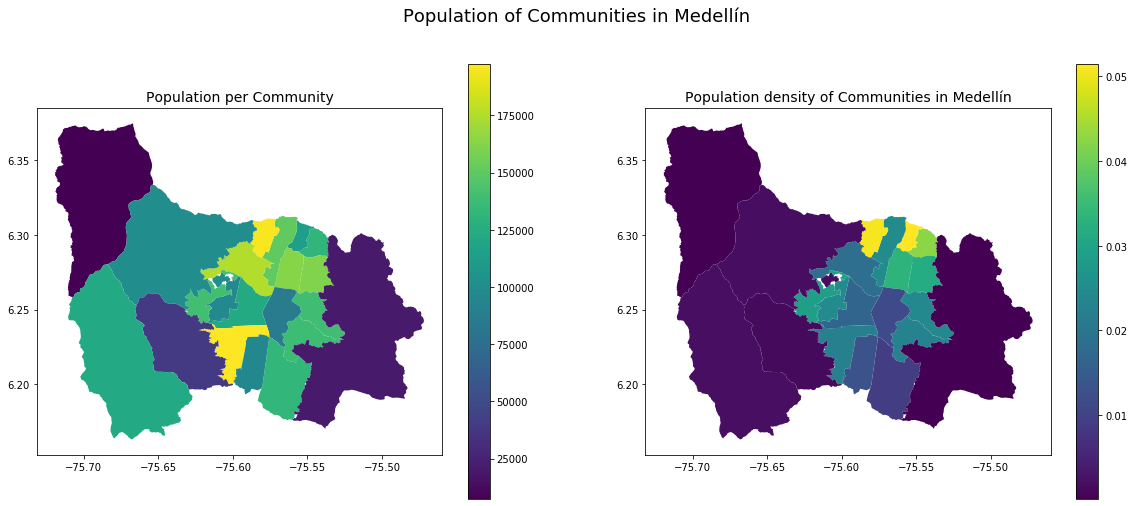

In [17]:
FinalCommPplDF = pd.merge(comunas[['CODIGO', 'NOMBRE','geometry', 'SHAPEAREA']], commPpl_edited[['codigo', 'total_2018']], 
                          left_on='NOMBRE', right_on='codigo', how='left')[['CODIGO', 'NOMBRE','geometry', 'SHAPEAREA', 'total_2018']]
# exclude reserves without population
FinalCommPplDF = FinalCommPplDF[FinalCommPplDF.CODIGO.astype(str).str[:2] != 'SN']
# convert CODIGO column type to enable merges with other tables
FinalCommPplDF['CODIGO'] = pd.to_numeric(FinalCommPplDF['CODIGO'])
FinalCommPplDF['POPULATION_DENSITY'] = FinalCommPplDF['total_2018']/FinalCommPplDF['SHAPEAREA']

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Population of Communities in Medellín', fontsize=18)
FinalCommPplDF.plot(column='total_2018',ax=axs[0], legend=True)
axs[0].set_title("Population per Community", fontsize=14)
FinalCommPplDF.plot(column=('POPULATION_DENSITY'),ax=axs[1], legend=True)
axs[1].set_title('Population density of Communities in Medellín', fontsize=14)


### 3.4 Historical Criminal Records <a name='HCR'></a>
<img src="resources/PN_Sample.jpg" alt="Drawing" style="width: 600px;" align="right"/>
<p>These records are compiled and for National Police Boureau.  They are presented as several spreadsheets with the same layout, so I consolidate the spreadsheets corresponding to crimes that has public impact:</p>
<ul>
    <li>Cattle theft</li>
    <li>Threats</li>
    <li>Sex crimes</li>
    <li>Homicides</li>
    <li>Theft to financial institutions</li>
    <li>Shoplifting</li>
    <li>Theft of Automobile</li>
    <li>Theft of Motorcycle</li>
    <li>Theft to people</li>
    <li>Personal injuries</li>
    <li>Terrestrial piracy</li>
</ul>
<p>Homicide in traffic Accident and personal injuries in traffic accident were excluded considering these do not involve criminal behavior that conditions the mind of public regarding their selection of a place for shopping, as other crimes.</p>

In [4]:
# iterate on files on the resources/CrimeData directory to read and append data into a common pandas dataframe
directory = "resources/CrimeData/"
state = 'ANTIOQUIA'
cities = ['MEDELLÍN (CT)'] # this list may be expanded to several cities for future studies
firstLoop = True
for filename in os.listdir(directory):
    partial = pd.read_excel(directory+filename, skiprows=8, skipfooter=4)
    filteredDF = partial[(partial['Municipio'].isin(cities)) & (partial['Departamento']==state)]
    filteredDF['Delito'] = filename[0:filename.find('-2018')]
    if firstLoop:
        crimeDF = filteredDF
        firstLoop = False
    else:
        crimeDF = pd.concat([crimeDF, filteredDF], ignore_index=True, sort=False)

# keep only columns of interest 
filteredDF = crimeDF[['Municipio','Barrio', 'Cantidad', 'Clase de sitio', 'Delito', 'Fecha', 'Día', 'Hora']]
filteredDF.to_csv('resources/Consolidated_Criminal_Records.csv')
filteredDF.head()

/home/dlema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Municipio,Barrio,Cantidad,Clase de sitio,Delito,Fecha,Día,Hora
0,MEDELLÍN (CT),PARQUE NORTE CNO REPORTADA4,1,VIAS PUBLICAS,amenazas,2018-01-01,Lunes,00:00:00
1,MEDELLÍN (CT),PARQUE NORTE CNO REPORTADA4,1,VIAS PUBLICAS,amenazas,2018-01-02,Martes,00:00:00
2,MEDELLÍN (CT),PARQUE NORTE CNO REPORTADA4,1,VIAS PUBLICAS,amenazas,2018-01-02,Martes,00:00:00
3,MEDELLÍN (CT),PARQUE NORTE CNO REPORTADA4,1,CARCELES,amenazas,2018-01-02,Martes,09:00:00
4,MEDELLÍN (CT),SAN PEDRO CNO REPORTADA4,1,VIAS PUBLICAS,amenazas,2018-01-02,Martes,13:00:00


Let's aggregate and pivot crime records, replace NaN by zeroes and save partial results:

In [6]:
CriminalRecordSummaryDF = filteredDF[['Barrio','Delito','Cantidad']].groupby(by=['Barrio', 'Delito']).sum().reset_index() \
    .pivot('Barrio', 'Delito', 'Cantidad') \
    .fillna(value=0)
CriminalRecordSummaryDF.to_csv("resources/CrimeSummary.csv")

# list of crime names
CrimeNamesList=filteredDF.Delito.unique()

# To save time, skip previous steps and restore prepared data:
# CriminalRecordSummaryDF = pd.read_csv('resources/CrimeSummary.csv')
print("first 5 rows on criminal record summary:")
CriminalRecordSummaryDF.head()

first 5 rows on criminal record summary:


Delito,abigeato,amenazas,delitos-sexuales,homicidios,hurto-a-entidades-financieras,hurto-comercio,hurto-de-automotores,hurto-de-motocicletas,hurto-personas,lesiones-personales,pirateria-terrestre
Barrio,,,,,,,,,,,
13 DE NOVIIEMBRE C-8,0.0,0.0,12.0,0.0,0.0,4.0,0.0,4.0,12.0,26.0,0.0
AEROPUERTO EL DORADO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGUAS FRIAS C-16,0.0,0.0,2.0,0.0,0.0,4.0,0.0,2.0,2.0,7.0,0.0
ALCONES S.A.P.,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0
ALDEA PABLO VI C-1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,5.0,5.0,0.0


<br><a href="#TOP">Return to Top</a>

In [19]:
NeighbourhoodNameMatchDF = pd.read_csv("resources/Barrios - Comunas.csv")

# merging Criminal records per neighbourhood to Neighbourhood/Community,
# grouped by crime and community.
# having community different from 0 (community equals zero is a data error, usually crimes belonging to another municipality)
# joined with community population, to enable crime rate calculation

partialJoinDF = CriminalRecordSummaryDF \
    .merge(NeighbourhoodNameMatchDF[NeighbourhoodNameMatchDF.Comuna != 0][['Barrio', 'Comuna']], left_on='Barrio', right_on='Barrio', how='inner') \
    .groupby(['Comuna']).sum().reset_index()

# for having geopandas result, the left side on the merge must be the geopandas data
JoinDF = FinalCommPplDF.merge(partialJoinDF, left_on='CODIGO', right_on='Comuna', how='outer')
CrimeNamesListEdited = [s + '/100K-inhabitants' for s in CrimeNamesList]

# Calculate Crime Rates per type of crime... Crime rate is the number of events per 100.000 inhabitants
JoinDF[CrimeNamesListEdited] = JoinDF[CrimeNamesList].div(JoinDF.total_2018, axis=0)*100000.0

Text(0.5, 1, 'Vehicle Theft')

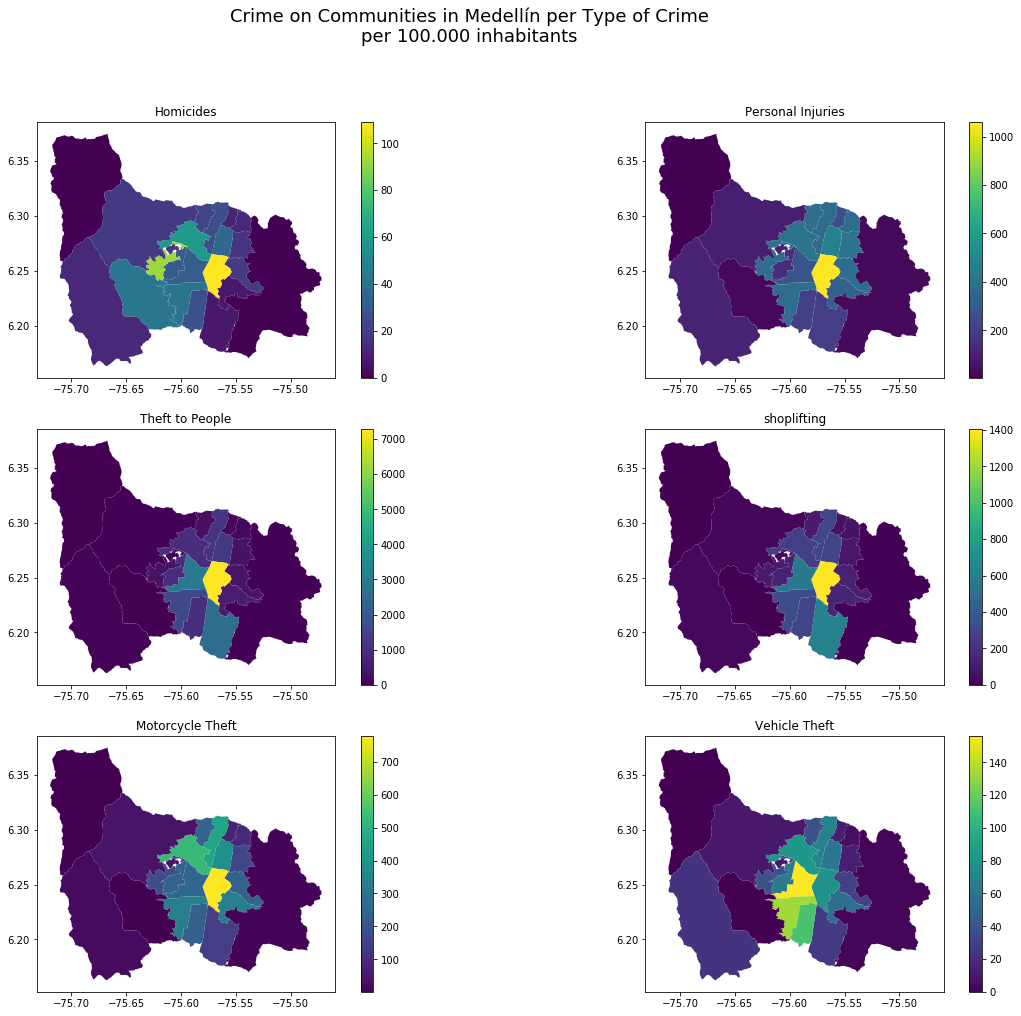

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('Crime on Communities in Medellín per Type of Crime\nper 100.000 inhabitants', fontsize=18)
## FinalCommPplDF.query('CODIGO == CODIGO') is for taking off rows corresponding to zones without population data
JoinDF.plot(column='homicidios',ax=axs[0,0], legend=True)
axs[0,0].set_title('Homicides')
JoinDF.plot(column='lesiones-personales',ax=axs[0,1], legend=True)
axs[0,1].set_title('Personal Injuries')
JoinDF.plot(column='hurto-personas',ax=axs[1,0], legend=True)
axs[1,0].set_title('Theft to People')
JoinDF.plot(column='hurto-comercio',ax=axs[1,1], legend=True)
axs[1,1].set_title('shoplifting')
JoinDF.plot(column='hurto-de-motocicletas',ax=axs[2,0], legend=True)
axs[2,0].set_title('Motorcycle Theft')
JoinDF.plot(column='hurto-de-automotores',ax=axs[2,1], legend=True)
axs[2,1].set_title('Vehicle Theft')

## 3.5 Partial Results Analysis <a class="anchor" id="PRA1"></a>
<p>Up to this point, we get that the higher population density are in north comunas (<i>Doce de Octubre</i> and <i>Santa Cruz</i>. Contrary to what Medellín citizens think, crime levels in these communities are not the highest. In fact, their crime levels are below average, making them good candidates to expand the business of convenience stores.</p>
<p>Consider that no information regarding economic level of these communities has been included in this study, and before taking a decision, further studies should be conducted</p>
<br><a href="#TOP">Return to Top</a>

## 4. Medellín Commercial Profiling <a class="anchor" id="profiling"></a>
<p>The following lines will show that Medellín is more comparable to a USA city than a European city:</p>

In [ ]:
CLIENT_ID = '*******' # your Foursquare ID
CLIENT_SECRET = '*******' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

### 4.1 Sampling of Large Cities <a class="anchor" id="LCL"></a>
The following paragraphs describe the method to obtain city information from public sources and transform them into an usable format for training a classifier. Before executing, let's set a sampling size: for debuging, a small sampling size may be convenient, for time reasons. 

In [3]:
sampleSize = 200

#### 4.1.1 European Large Cities<a class="anchor" id="EUC"></a>
<p>Wiki published a list of large cities in Europe ordered by population at https://ibm.biz/BdzWKG</p>.

In [4]:
europeanCitiesURL = "https://ibm.biz/BdzWKG"
europeanCities = pd.read_html(europeanCitiesURL)

<p>After an exploratory research, it has been clear that the specific table of interest is the fourth</p>

In [5]:
europeanCitiesDF = europeanCities[3][:]
europeanCitiesDF.columns = europeanCitiesDF.columns.get_level_values(0) + "." + europeanCitiesDF.columns.get_level_values(1)
nan_value = float("NaN")
europeanCitiesDF["Longitude"] = nan_value
europeanCitiesDF["Latitude"] = nan_value

/home/dlema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dlema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
europeanCitiesDF.head()

,Clasificación.Europa,Clasificación.UE,Clasificación.País,Ciudad.Nombre en español,Ciudad.Nombre en idioma original,Localización.País,Localización.Entidad administrativa,Localización.Subentidad administrativa,Unnamed: 8_level_0.Población,Longitude,Latitude
0,1,-,TUR-01,Estambul,İstanbul,Turquía,Provincia de Estambul,NaN,14 657 434,NaN,NaN
1,2,-,RUS-0001,Moscú,Москва́,Rusia,Distrito federal Central,Ciudad federal de Moscú,12 380 664,NaN,NaN
2,3,UE-001,GBR-01,Londres,London,Reino Unido,Inglaterra,Gran Londres,8 787 892,NaN,NaN
3,4,-,RUS-0002,San Petersburgo,Санкт-Петербург,Rusia,Distrito federal del Noroeste,Ciudad federal de San Petersburgo,5 281 579,NaN,NaN
4,5,UE-002,ALE-01,Berlín,Berlin,Alemania,Berlín,NaN,3 469 849,NaN,NaN


<p>This table has to be enriched with geo-reference of the centroid of the city (limiting to the first 100 rows, for time restrictions)</p>

In [7]:
geolocator = Nominatim(user_agent="foursquare_agent")
i = 0
for index, row in europeanCitiesDF.iterrows():
    # print("index: ", index)
    location = geolocator.geocode(row["Ciudad.Nombre en español"] + " - " + row["Localización.País"],timeout=15)
    if not location is None:
        # print(location, ": (", location.latitude, ", ", location.longitude, ")")
        europeanCitiesDF.loc[index, "Latitude"] = location.latitude
        europeanCitiesDF.loc[index, "Longitude"] = location.longitude
        i = i +1
    if i >= sampleSize:
        break

/home/dlema/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
europeanCitiesDF.head()

,Clasificación.Europa,Clasificación.UE,Clasificación.País,Ciudad.Nombre en español,Ciudad.Nombre en idioma original,Localización.País,Localización.Entidad administrativa,Localización.Subentidad administrativa,Unnamed: 8_level_0.Población,Longitude,Latitude
0,1,-,TUR-01,Estambul,İstanbul,Turquía,Provincia de Estambul,NaN,14 657 434,28.965165,41.009633
1,2,-,RUS-0001,Moscú,Москва́,Rusia,Distrito federal Central,Ciudad federal de Moscú,12 380 664,37.617494,55.750446
2,3,UE-001,GBR-01,Londres,London,Reino Unido,Inglaterra,Gran Londres,8 787 892,-0.127647,51.507322
3,4,-,RUS-0002,San Petersburgo,Санкт-Петербург,Rusia,Distrito federal del Noroeste,Ciudad federal de San Petersburgo,5 281 579,30.316229,59.938732
4,5,UE-002,ALE-01,Berlín,Berlin,Alemania,Berlín,NaN,3 469 849,13.388860,52.517037


In [9]:
europeanCitiesDF = europeanCitiesDF[europeanCitiesDF['Longitude'] == europeanCitiesDF['Longitude']][['Ciudad.Nombre en español', 'Localización.País', 'Longitude', 'Latitude']]
europeanCitiesDF.columns = ['City', 'Country_State', 'Longitude', 'Latitude']
europeanCitiesDF.head()

,City,Country_State,Longitude,Latitude
0,Estambul,Turquía,28.965165,41.009633
1,Moscú,Rusia,37.617494,55.750446
2,Londres,Reino Unido,-0.127647,51.507322
3,San Petersburgo,Rusia,30.316229,59.938732
4,Berlín,Alemania,13.388860,52.517037


#### 4.1.2 United States Large Cities <a class="anchor" id="USAC"></a>
<p>Wiki provides a list of large cities in United States by population and population density at https://ibm.biz/BdzWK9.  The procedure is basically the same used with Europe countries but table layout is slightly different.

In [10]:
USACitiesURL = "https://ibm.biz/BdzWK9"
USACities = pd.read_html(USACitiesURL)

USACitiesDF = USACities[3][["Ciudad", "Estado"]]

USACitiesDF["Longitude"] = nan_value
USACitiesDF["Latitude"] = nan_value

i = 0
for index, row in USACitiesDF.iterrows():
    location = geolocator.geocode(row["Ciudad"] + ", " + row["Estado"] + ", United States of America",timeout=15)
    if not location is None:
        USACitiesDF.loc[index, "Latitude"] = location.latitude
        USACitiesDF.loc[index, "Longitude"] = location.longitude
        i = i +1
    if i >= sampleSize:
        break

USACitiesDF = USACitiesDF[USACitiesDF['Longitude'] == USACitiesDF['Longitude']]
USACitiesDF.columns = ['City', 'Country_State', 'Longitude', 'Latitude']
USACitiesDF.head()

/home/dlema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dlema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,City,Country_State,Longitude,Latitude
0,Nueva York,Nueva York,-74.006015,40.712728
1,Los Ángeles,California,-118.242767,34.053691
2,Chicago,Illinois,-87.624421,41.875562
3,Houston,Texas,-95.367697,29.758938
4,Filadelfia,Pensilvania,-75.163526,39.952724


#### 4.1.3 Adding Medellín to Cities Dataset <a class="anchor" id="med2df"></a>

In [11]:
data = [['Medellín', 'Antioquia', -75.590553, 6.230833, 'Colombia']]
Medellin = pd.DataFrame(data, columns=['City', 'Country_State', 'Longitude', 'Latitude', 'Class'])
Medellin

,City,Country_State,Longitude,Latitude,Class
0,Medellín,Antioquia,-75.590553,6.230833,Colombia


### 4.2 Joinning Datasets Together<a class="anchor" id="JDT2"></a>
<p>At this point we have sample cities from Europe and United States and we need to join them in a single table

In [12]:
europeanCitiesDF['Class'] = 'Europe'
USACitiesDF['Class'] = 'USA'
citiesDF = pd.concat([USACitiesDF, europeanCitiesDF, Medellin], ignore_index=True, sort=False)

In [13]:
citiesDF['Composed_City_Name'] = citiesDF['City'] + ', ' + citiesDF['Country_State'] + ', ' + citiesDF['Class']
citiesDF.tail()

,City,Country_State,Longitude,Latitude,Class,Composed_City_Name
396,Brighton & Hove,Reino Unido,-0.149759,50.845221,Europe,"Brighton & Hove, Reino Unido, Europe"
397,Graz,Austria,15.438279,47.070868,Europe,"Graz, Austria, Europe"
398,Cherkasy,Ucrania,32.058780,49.444789,Europe,"Cherkasy, Ucrania, Europe"
399,Liubliana,Eslovenia,14.506782,46.049815,Europe,"Liubliana, Eslovenia, Europe"
400,Medellín,Antioquia,-75.590553,6.230833,Colombia,"Medellín, Antioquia, Colombia"


### 4.3 Enrich with Venues <a class="anchor" id="enrich"></a>
<p>Now we obtain venues distribution per city to enrich data to train classifier.  When preparing and enrich cities, it is very important to exclude from data set latitude and longitude columns, given that longitude column will drive the algorithm to recognize city profile for their position in the globe, something we want to avoid.</p>

In [14]:
def getCityVenues(names, latitudes, longitudes, radius=1000, limit=100):
    
    print("names size: ", names.size)
    print("latitudes size: ", latitudes.size)
    print("longitudes size: ", longitudes.size)
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venues])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [15]:
limit = 100
city_venues = getCityVenues(names=citiesDF['Composed_City_Name'],
                                   latitudes=citiesDF['Latitude'],
                                   longitudes=citiesDF['Longitude'],
                                   limit=limit
                                  )

names size:  401
latitudes size:  401
longitudes size:  401
Nueva York, Nueva York, USA
Los Ángeles, California, USA
Chicago, Illinois, USA
Houston, Texas, USA
Filadelfia, Pensilvania, USA
Phoenix, Arizona, USA
San Antonio, Texas, USA
San Diego, California, USA
Dallas, Texas, USA
San José, California, USA
Jacksonville, Florida, USA
Indianápolis, Indiana, USA
San Francisco, California, USA
Austin, Texas, USA
Columbus, Ohio, USA
Fort Worth, Texas, USA
Charlotte, Carolina del Norte, USA
Detroit, Míchigan, USA
El Paso, Texas, USA
Memphis, Tennessee, USA
Baltimore, Maryland, USA
Boston, Massachusetts, USA
Seattle, Washington, USA
Washington, Distrito de Columbia, USA
Nashville, Tennessee, USA
Denver, Colorado, USA
Louisville, Kentucky, USA
Milwaukee, Wisconsin, USA
Portland, Oregón, USA
Las Vegas, Nevada, USA
Oklahoma City, Oklahoma, USA
Albuquerque, Nuevo México, USA
Tucson, Arizona, USA
Fresno, California, USA
Sacramento, California, USA
Long Beach, California, USA
Kansas City (Misuri), M

Once the venues has been obtained, they will be pivoted (one-hot encoded) and aggregated by city:

In [17]:
# one hot encoding
city_venues_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_venues_onehot['Composed_City_Name'] = city_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [city_venues_onehot.columns[-1]] + list(city_venues_onehot.columns[:-1])
city_venues_onehot = city_venues_onehot[fixed_columns]

cities_grouped = city_venues_onehot.groupby('Composed_City_Name').mean().reset_index()
cities_grouped.head()

In [22]:
enrichedCitiesDF = citiesDF.merge(cities_grouped, left_on='Composed_City_Name', right_on='Composed_City_Name')

# independent columns  Notice that latitude and longitude columns are not included, only venues
columns = city_venues['Venue Category'].unique()

X = enrichedCitiesDF[enrichedCitiesDF["Class"] != 'Colombia'][columns]
y = enrichedCitiesDF[enrichedCitiesDF["Class"] != 'Colombia']['Class']

### 4.4 Trainning and Testing City Classifier <a class="anchor" id="train"></a>
<p>Let's prepare two datasets, one for training and another for testing the classifier algorithm.  Then train and test the algorithm:</p>

In [1]:
X_train, X_test, y_train, y_test = ttsplit(X, y, test_size = 0.2)

classifier = knn(n_neighbors=4)
classifier.fit(X_train, y_train)

yhat = classifier.predict(X_test)

In [26]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, classifier.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9936708860759493
Test set Accuracy:  0.9746835443037974


<p>Classifier seems to be very precise in classifying cities, so, I decide to proceed to use it to classify Medellín</p>

### 4.5 Classifying Medellín <a class="anchor" id="classify"></a>
Now, Medellín data has to be prepared to classify the city according to the city classifier

In [27]:
X_med = enrichedCitiesDF[enrichedCitiesDF["Class"] == 'Colombia'][columns]
ymed = classifier.predict(X_med)
ymed

array(['USA'], dtype=object)

It can be concluded that, from a commercial perspective, Medellín city is closest to an USA city than to an European city. This means the type of commercial places available in Medellín resembles more to a USA city. This conclusion does not analyze macroeconomic capabilities

## 5. Conclusion <a class="anchor" id="conclusion"></a>
<p>I have been shown which are the most densely populated communities in Medellín, being <i>Doce de Octubre</i> and <i>Santa Cruz</i> these communities. <b>contrary to the common opinion</b> (including my own), data shows that these communities <b>does not</b> have higher criminal risk than other places in the city, as can be shown in the presented criminalistic heat maps below.</p>
<p>It is also noticeable that the commercial profile of the city resemble more an US city than an European city, something that is also counterintuitive.</p>
<p>Given these findings, <b>I recommend to invest in convenience stores in <i>Doce de Octubre</i> and <i>Santa Cruz</i>, using the store format of USA stores</b></p>